In [247]:
#import the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [248]:
data=pd.read_csv('clean_data.csv')
data.head()

,Unnamed: 0,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,0,43390,1,10.00,0.01,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,1,43599,1,13.07,3.48,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2,43414,1,13.07,3.46,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,3,43533,1,13.07,3.47,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,4,43605,1,13.43,3.83,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [249]:
#drop unneccesary columns
data=data.drop(columns='Unnamed: 0')

In [250]:
data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,43390,1,10.00,0.01,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,13.07,3.48,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,13.07,3.46,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,13.07,3.47,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,13.43,3.83,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [251]:
data.shape

(264141, 10)

### oops, forgot to change the date format in the data cleaning stage, so would do it now

In [252]:
#fix datetype
date_offsets = data['date']
base_date = pd.Timestamp('1901-01-01')  # check this!
data['date'] = [
    base_date + pd.DateOffset(date_offset) 
    for date_offset in date_offsets
]

In [253]:
data.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,2019-10-19,1,10.00,0.01,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2020-05-15,1,13.07,3.48,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-11-12,1,13.07,3.46,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2020-03-10,1,13.07,3.47,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2020-05-21,1,13.43,3.83,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [254]:
data['date'].value_counts()

2019-12-26    939
2019-12-25    917
2019-12-24    915
2019-12-21    906
2019-12-20    862
             ... 
2019-11-27    648
2020-05-18    645
2019-08-22    642
2020-05-19    631
2020-05-16    631
Name: date, Length: 364, dtype: int64

In [255]:
data['prod_name'].value_counts()

Kettle Tortilla ChpsHny&Jlpno Chili 150g    3285
Kettle Mozzarella   Basil & Pesto 175g      3277
Tyrrells Crisps     Ched & Chives 165g      3264
Cobs Popd Sea Salt  Chips 110g              3259
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3259
                                            ... 
Woolworths Medium   Salsa 300g              1430
RRD Pc Sea Salt     165g                    1428
French Fries Potato Chips 175g              1418
NCC Sour Cream &    Garden Chives 175g      1416
WW Crinkle Cut      Original 175g           1410
Name: prod_name, Length: 114, dtype: int64

In [256]:
#convert all the texts to lowercase
data['prod_name']=data['prod_name'].str.lower()
data['lifestage']=data['lifestage'].str.lower()
data['premium_customer']=data['premium_customer'].str.lower()

In [257]:
#data['chips_or_not'] = \
 #   np.where(data['prod_name'].str.contains('chip'), 1, 0)

In [258]:
data.head(10)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
0,2019-10-19,1,10.00,0.01,5,natural chip compny seasalt175g,2,6.0,young singles/couples,premium
1,2020-05-15,1,13.07,3.48,66,ccs nacho cheese 175g,3,6.3,midage singles/couples,budget
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget
3,2020-03-10,1,13.07,3.47,54,ccs original 175g,1,2.1,midage singles/couples,budget
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget
5,2019-08-20,2,24.26,10.38,108,kettle tortilla chpshny&jlpno chili 150g,3,13.8,midage singles/couples,budget
6,2020-05-20,4,40.74,29.82,57,old el paso salsa dip tomato mild 300g,1,5.1,midage singles/couples,budget
7,2019-08-08,4,40.74,29.78,70,tyrrells crisps lightly salted 165g,2,8.4,midage singles/couples,budget
8,2019-08-11,4,40.74,29.79,60,kettle tortilla chpsfeta&garlic 150g,2,9.2,midage singles/couples,budget
9,2019-12-14,4,40.74,29.80,4,dorito corn chp supreme 380g,2,13.0,midage singles/couples,budget


In [259]:
data['date'].value_counts()

2019-12-26    939
2019-12-25    917
2019-12-24    915
2019-12-21    906
2019-12-20    862
             ... 
2019-11-27    648
2020-05-18    645
2019-08-22    642
2020-05-19    631
2020-05-16    631
Name: date, Length: 364, dtype: int64

In [260]:
#extract only product names containing chips
chips = data[data['prod_name'].str.contains('chips', regex=False, case=False, na=False)]

In [261]:
chips.shape

(49663, 10)

In [262]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget


In [263]:
#extract brand name
chips['brand name']=chips['prod_name'].str.split(' ', expand=True)[0]

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [264]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins


In [265]:
chips['brand name'].value_counts()

thins      14046
cobs        9668
doritos     9475
smiths      9082
ww          5974
french      1418
Name: brand name, dtype: int64

brand name
cobs       7.254903
doritos    8.393668
french     5.591678
smiths     7.345155
thins      6.293870
ww         3.583093
Name: tot_sales, dtype: float64


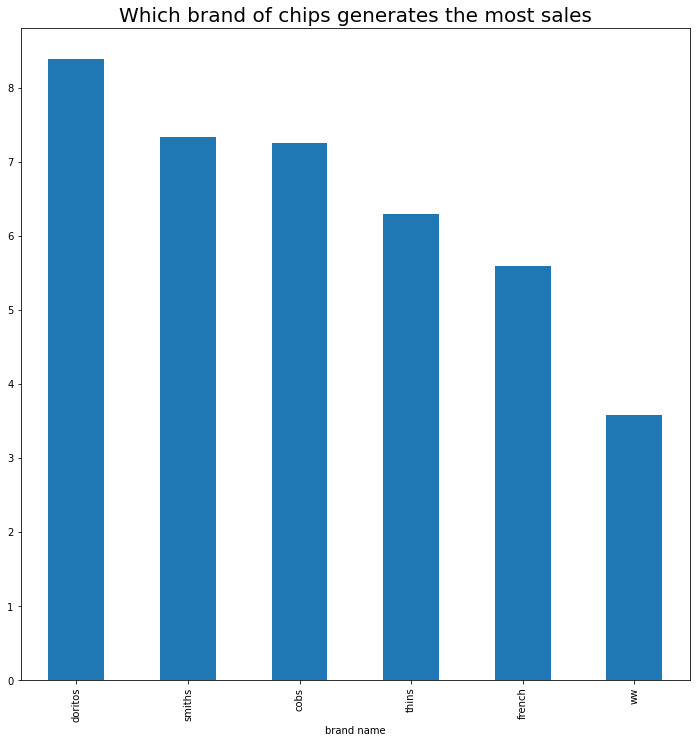

In [266]:
print(chips.groupby('brand name')['tot_sales'].mean())
ax=(chips.groupby('brand name')['tot_sales'].mean().sort_values(ascending=False)).plot(kind='bar', figsize=(12,12))
ax.set_title('Which brand of chips generates the most sales',fontdict={'size':20});

#### The dorito brand is the brand with the highest sales, so there should be a big emphasis toward bringing in more dorito chips. smiths and cobs should also be targeted more. ww chips doesnt seem to generate a lot of sales, with doritos generating more than double the sales of ww, therefore more emphasis should not go to ww  but to the brand of chips with the higher sales like doritos

In [267]:
chips['premium_customer'].value_counts()/len(chips['premium_customer'])

mainstream    0.384773
budget        0.353301
premium       0.261925
Name: premium_customer, dtype: float64

lifestage
midage singles/couples    6.720119
new families              6.668012
older families            6.740379
older singles/couples     6.779023
retirees                  6.770238
young families            6.712575
young singles/couples     6.611025
Name: tot_sales, dtype: float64


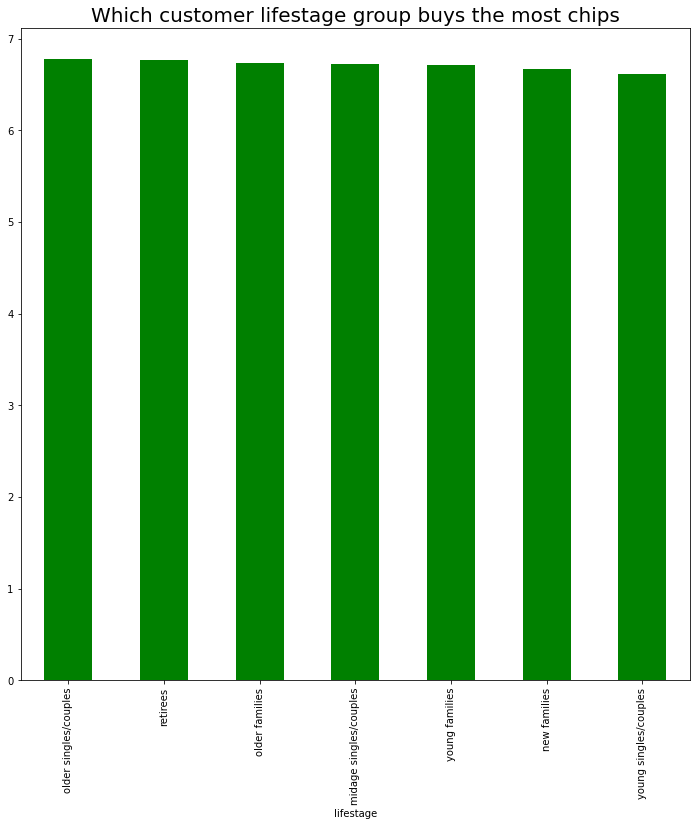

In [268]:
print(chips.groupby('lifestage')['tot_sales'].mean())
ax=(chips.groupby('lifestage')['tot_sales'].mean().sort_values(ascending=False)).plot(kind='bar', figsize=(12,12), color='green')
ax.set_title('Which customer lifestage group buys the most chips',fontdict={'size':20});

#### The older generation tends to buy more chips than the younger generation. the older singles/couples spend on average 6.779 dollars on chips with the young singles/couples spending 6.611 dollars on chips. The difference is not that much, so it would not be a good idea to focus on a particular customer lifestage group, emphasis should be shown to other areas

In [269]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins


premium_customer
budget        17546
mainstream    19109
premium       13008
Name: tot_sales, dtype: int64


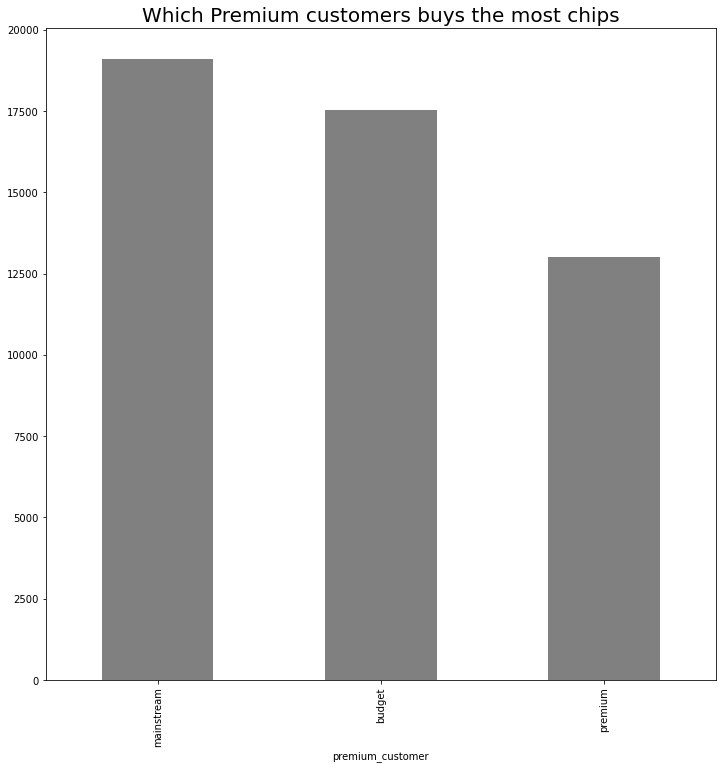

In [270]:
print(chips.groupby('premium_customer')['tot_sales'].count())
ax=(chips.groupby('premium_customer')['tot_sales'].count().sort_values(ascending=False)).plot(kind='bar', figsize=(12,12), color='gray')
ax.set_title('Which Premium customers buys the most chips',fontdict={'size':20});

#### customers who spend more for brand, spends the most on chips with the ones that spend more on quality, spending the least. With the values being so close, this alos isnt an area to focus on

In [271]:
chips.head(1)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww


lifestage
midage singles/couples     8921
new families               2394
older families            17609
older singles/couples     19540
retirees                  17610
young families            15683
young singles/couples     12632
Name: prod_qty, dtype: int64


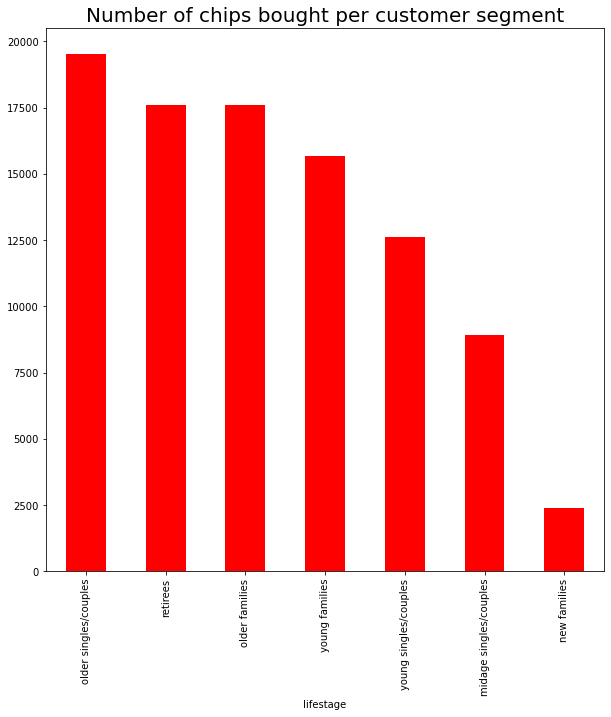

In [272]:
print(chips.groupby('lifestage')['prod_qty'].sum())
ax=(chips.groupby('lifestage')['prod_qty'].sum().sort_values(ascending=False)).plot(kind='bar', figsize=(10,10), color='red')
ax.set_title('Number of chips bought per customer segment',fontdict={'size':20});

In [273]:
chips['store_nbr'].value_counts()

226    409
88     377
4      362
165    355
237    350
      ... 
117      9
139      9
244      9
161      7
11       2
Name: store_nbr, Length: 264, dtype: int64

In [274]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins


In [275]:
#extract the month column from the date
chips['month']=chips['date'].dt.month

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [276]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths,5
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths,5
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins,7
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins,11


In [277]:
chips['month'].value_counts()/len(chips['month'])

12    0.087349
3     0.085758
10    0.085557
5     0.083785
7     0.083684
6     0.083583
1     0.083241
8     0.082536
11    0.082415
4     0.081449
9     0.081268
2     0.079375
Name: month, dtype: float64

Text(0.5, 1.0, 'Total Sales of Chips per month')

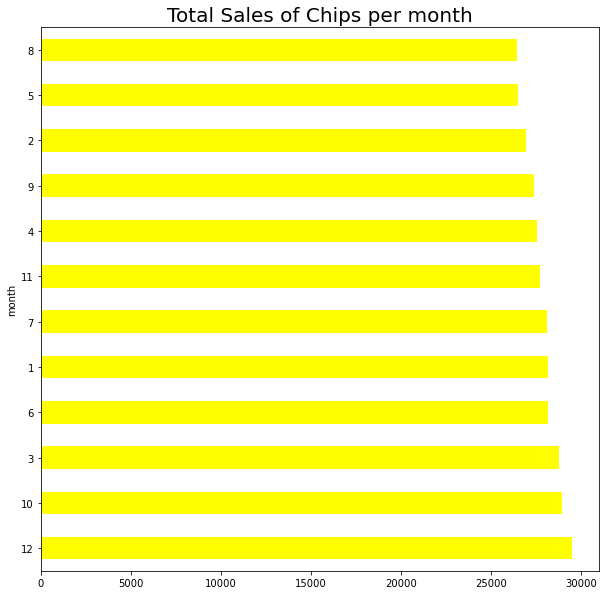

In [278]:
#print(chips.groupby('month')['tot_sales'].sum())
ax=chips.groupby('month')['tot_sales'].sum().sort_values(ascending=False).plot(kind='barh',figsize=(10,10), color='yellow')
ax.set_title('Total Sales of Chips per month',fontdict={'size':20})

#### December is the month with the highest sales of chips and august is the month with the least. There does not seem to be a big difference in money generated by chips per month across the various months.

Text(0.5, 1.0, 'Top 10 days with Highest Sales of Chips')

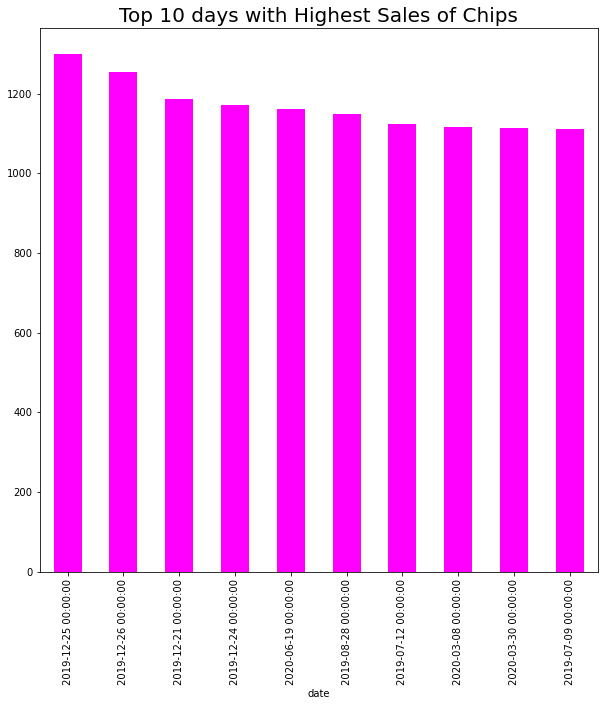

In [279]:
#print(chips.groupby('date')['tot_sales'].sum().sort_values(ascending=False)[:10])
ax=chips.groupby('date')['tot_sales'].sum().sort_values(ascending=False)[:10].plot(kind='bar',figsize=(10,10), color='magenta')
ax.set_title('Top 10 days with Highest Sales of Chips',fontdict={'size':20})

#### Its clear to see around christmas is the time of the year with the highest number of sales of chips. 25th, 26th, 21st and 24th decemeber are the top 4 days where the most money is generated. More chips should be produced around that time of the year, and even a slight increase in cost would still result in a lot of sales.

In [280]:
chips.head(1)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11


In [281]:
chips['month']=chips['month'].replace({1:13,2:14})

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
chips['seasons']=pd.cut(chips['month'], [3,5,8,11,14], labels=['spring','summer','autumn','Winter'], right=False,include_lowest=True)

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [283]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month,seasons
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11,Winter
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths,5,summer
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths,5,summer
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins,7,summer
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins,11,Winter


In [284]:
chips['seasons'].value_counts()/len(chips['seasons'])

Winter    0.253005
summer    0.251052
autumn    0.249361
spring    0.167207
Name: seasons, dtype: float64

seasons
Winter    85380.4
autumn    82755.7
summer    82726.4
spring    56315.9
Name: tot_sales, dtype: float64


Text(0.5, 1.0, 'Highest Sales of Chips per Season')

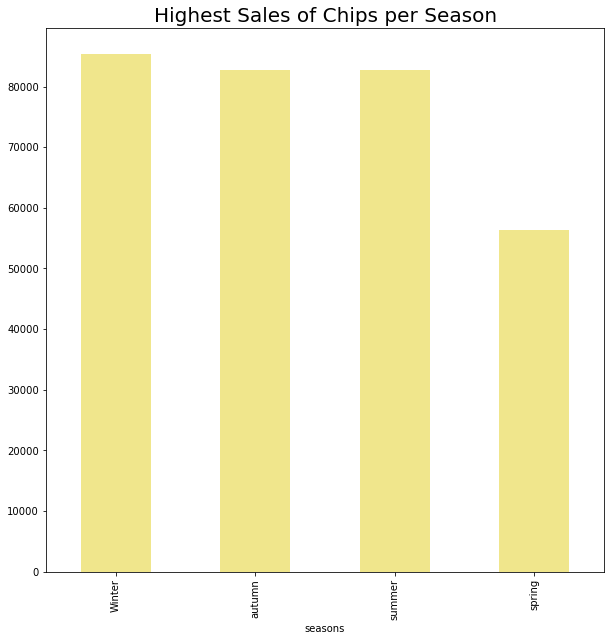

In [285]:
print(chips.groupby('seasons')['tot_sales'].sum().sort_values(ascending=False))
ax=chips.groupby('seasons')['tot_sales'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,10), color='khaki')
ax.set_title('Highest Sales of Chips per Season',fontdict={'size':20})

#### Winter is the season with the highest total sales of chips, with spring the lowest. Some emphasis should be made towards increased advertissement in the spring period to bring sales up and more chips should be produced duirng the winter since its the time that chips are sold the most

In [286]:
chips.head(2)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month,seasons
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11,Winter
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths,5,summer


In [287]:
#extract packet size from product name
chips['packet_size']=chips['prod_name'].str.split(' ').str[-1]

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [288]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month,seasons,packet_size
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11,Winter,160g
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths,5,summer,170g
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths,5,summer,330g
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins,7,summer,175g
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins,11,Winter,175g


In [289]:
#removing the g
chips['packet_size']=chips['packet_size'].str.rstrip('g')

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [290]:
chips.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,lifestage,premium_customer,brand name,month,seasons,packet_size
2,2019-11-12,1,13.07,3.46,96,ww original stacked chips 160g,2,3.8,midage singles/couples,budget,ww,11,Winter,160
4,2020-05-21,1,13.43,3.83,61,smiths crinkle cut chips chicken 170g,2,2.9,midage singles/couples,budget,smiths,5,summer,170
11,2020-05-17,4,41.49,33.33,16,smiths crinkle chips salt & vinegar 330g,1,5.7,midage singles/couples,budget,smiths,5,summer,330
19,2020-07-01,4,41.96,35.40,28,thins potato chips hot & spicy 175g,2,6.6,midage singles/couples,budget,thins,7,summer,175
24,2019-11-02,5,50.26,45.28,44,thins chips light& tangy 175g,2,6.6,midage singles/couples,budget,thins,11,Winter,175


In [291]:
chips['packet_size'].value_counts()

175             15464
170             13896
110              9668
330              3185
200              3004
160              2970
chs&onion170     1476
Name: packet_size, dtype: int64

In [292]:
#remove the words
chips['packet_size']=chips['packet_size'].str.replace('chs&onion', '')

C:\Users\ampad\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [293]:
chips['packet_size'].value_counts()/len(chips['packet_size'])

175    0.311379
170    0.309526
110    0.194672
330    0.064132
200    0.060488
160    0.059803
Name: packet_size, dtype: float64

In [313]:
chips.groupby(['brand name','packet_size'])['tot_sales'].max()

brand name  packet_size
cobs        110            11.4
doritos     170            13.2
french      175             9.0
smiths      170            11.6
            330            11.4
thins       175            13.2
ww          160             9.5
            200             9.5
Name: tot_sales, dtype: float64